In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Part 1: Learn how to Use Data as Information

Step 1: Describe the data.

In [2]:
ws1 = pd.read_csv('ws1.csv')
ws1

,Year,Median Age Of Males,Median Age Of Females
0,1890,26.1,22.0
1,1900,25.9,21.9
2,1910,25.1,21.6
3,1920,24.6,21.2
4,1930,24.3,21.3
5,1940,24.3,21.5
6,1950,22.8,20.3
7,1960,22.8,20.3
8,1970,23.2,20.8
9,1980,24.7,22.0


In [3]:
# min max median age
max_male = ws1['Median Age Of Males'].max()
min_male = ws1['Median Age Of Males'].min()
max_female = ws1['Median Age Of Females'].max()
min_female = ws1['Median Age Of Females'].min()
print("Male median age : Min = {} and Max = {}".format(min_male, max_male))
print("Female median age : Min = {} and Max = {}".format(min_female, max_female))

Male median age : Min = 22.8 and Max = 26.8
Female median age : Min = 20.3 and Max = 25.1


In [4]:
# The range is a type of descriptive statistic that summarizes the data. It has been presented above in a numerical format. But if you need to look at the trend of the data, it may be better to graph or plot the data.
ws1.describe()

,Year,Median Age Of Males,Median Age Of Females
count,12.000000,12.000000,12.000000
mean,1945.000000,24.725000,21.825000
std,36.055513,1.339013,1.402028
min,1890.000000,22.800000,20.300000
25%,1917.500000,24.025000,21.100000
50%,1945.000000,24.650000,21.550000
75%,1972.500000,25.950000,22.000000
max,2000.000000,26.800000,25.100000


Step 2: Plot the data.

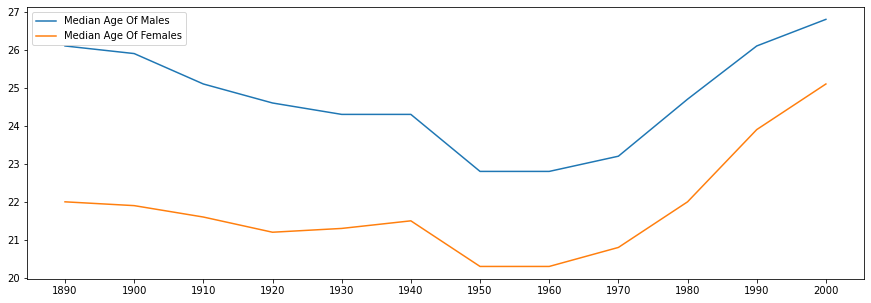

In [5]:
plt.rcParams['figure.figsize'] = (15,5)
ws1[['Median Age Of Males', 'Median Age Of Females']].plot()
plt.xticks(ws1.index,ws1['Year'].values)
plt.show()



Step 3: Perform simple data prediction.

In [6]:
# interpolate data di tahun 1920
males = []
females = []
year = "1920"
for a in range(ws1['Year'].count()):
    males.append(ws1['Median Age Of Males'][a])
    females.append(ws1['Median Age Of Females'][a])
males_ip = np.interp(year,ws1['Year'], males)
females_ip = np.interp(year,ws1['Year'], females)
print("Median Males & Females Year 1900 = {} & {}".format(males[1],females[1]))
print("Median Males & Females Year {} = {} & {}".format(year,males_ip,females_ip))

Median Males & Females Year 1900 = 25.9 & 21.9
Median Males & Females Year 1920 = 24.6 & 21.2


In [7]:
# prediksi median data di tahun 2020 extrapolation
year ="2020"
male_ip = interpolate.interp1d(ws1['Year'], males, fill_value='extrapolate')
female_ip = interpolate.interp1d(ws1['Year'], females, fill_value='extrapolate')
print("Median Males & Females Year 2000 = {} & {}".format(males[11],females[11]))
print("Median Males & Females Year {} = {} & {}".format(year,males_ip,females_ip))

Median Males & Females Year 2000 = 26.8 & 25.1
Median Males & Females Year 2020 = 24.6 & 21.2


In [8]:
range_age = []
for i in range(ws1['Year'].count()):
    range_age.append(ws1['Median Age Of Males'][i] - ws1['Median Age Of Females'][i])
range_ages ={'Year':ws1['Year'],'Difference Age':range_age}
range_ages = pd.DataFrame(range_ages)
diff_age = ws1.assign(Difference = range_age)
diff_age


,Year,Median Age Of Males,Median Age Of Females,Difference
0,1890,26.1,22.0,4.1
1,1900,25.9,21.9,4.0
2,1910,25.1,21.6,3.5
3,1920,24.6,21.2,3.4
4,1930,24.3,21.3,3.0
5,1940,24.3,21.5,2.8
6,1950,22.8,20.3,2.5
7,1960,22.8,20.3,2.5
8,1970,23.2,20.8,2.4
9,1980,24.7,22.0,2.7


# Part 2: Plot data and Predict Values

In [9]:
ws2= pd.read_csv('ws2.csv')
ws2

,Year,Men hours housework week,Woman hours housework week
0,1965,4.4,31.9
1,1975,6.0,23.6
2,1985,10.2,20.7
3,1995,10.2,18.9
4,2000,10.0,18.6
5,2005,9.2,19.1
6,2010,10.0,17.4
7,2015,9.8,17.8


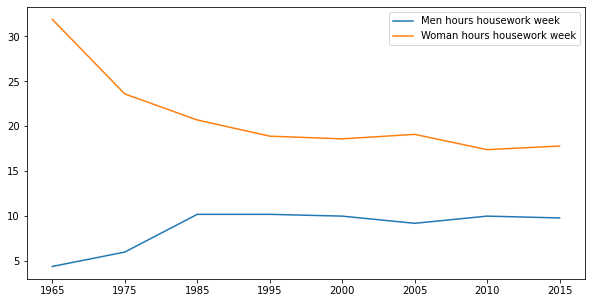

In [10]:
# plot data
plt.rcParams['figure.figsize'] = (10,5)
ws2[['Men hours housework week','Woman hours housework week']].plot()
plt.xticks(ws2.index, ws2['Year'].values)
plt.show()

In [11]:
# interpolate missing year
men = []
woman= []
miss_year = ['1970','1980','1990','2020']
miss_val_men=[]
miss_val_woman=[]
for i in range (ws2['Year'].count()):
    men.append(ws2['Men hours housework week'][i])
    woman.append(ws2['Woman hours housework week'][i])
for i in range(len(miss_year)):
    miss_val_men.append(np.interp(miss_year[i],ws2['Year'],men))
    miss_val_woman.append(np.interp(miss_year[i],ws2['Year'],woman))

In [12]:
predict={'Year':miss_year,'Men hours housework week':miss_val_men,'Woman hours housework week':miss_val_woman}
predict_miss_year = pd.DataFrame(predict)
predict_miss_year

,Year,Men hours housework week,Woman hours housework week
0,1970,5.2,27.75
1,1980,8.1,22.15
2,1990,10.2,19.80
3,2020,9.8,17.80


In [13]:
# extrapolate untuk tahun 2020
men_work = interpolate.interp1d(ws2['Year'], men, fill_value='extrapolate')
woman_work = interpolate.interp1d(ws2['Year'], woman, fill_value='extrapolate')
year ="2020"
print("Work Men & Women Year 2015 = {} & {}".format(men[7],woman[7]))
print("Work Men & Women Year {} = {:.2f} & {:.2f}".format(year,men_work(year),woman_work(year)))

Work Men & Women Year 2015 = 9.8 & 17.8
Work Men & Women Year 2020 = 9.60 & 18.20


In [14]:
# gap women hours & men hours
range_work = []
for i in range(ws2['Year'].count()):
    range_work.append(ws2['Woman hours housework week'][i]-ws2['Men hours housework week'][i] )
range_works ={'Year':ws2['Year'],'Difference Works':range_work}
range_works = pd.DataFrame(range_works)
diff_work = ws2.assign(Difference = range_work)
diff_work

,Year,Men hours housework week,Woman hours housework week,Difference
0,1965,4.4,31.9,27.5
1,1975,6.0,23.6,17.6
2,1985,10.2,20.7,10.5
3,1995,10.2,18.9,8.7
4,2000,10.0,18.6,8.6
5,2005,9.2,19.1,9.9
6,2010,10.0,17.4,7.4
7,2015,9.8,17.8,8.0


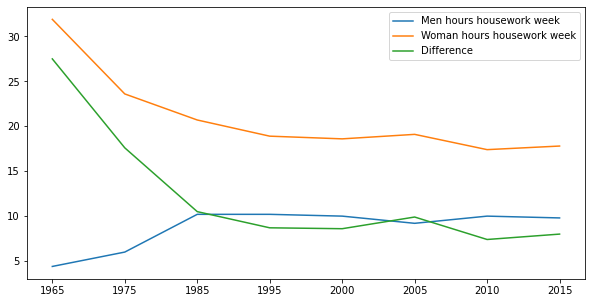

In [17]:
plt.rcParams['figure.figsize'] = (10,5)
diff_work[['Men hours housework week', 'Woman hours housework week','Difference']].plot()
plt.xticks(diff_work.index,diff_work['Year'].values)
plt.show()